# Computation Graph

Ref:

    1. https://colah.github.io/posts/2015-08-Backprop/
    2. https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html

Computational graphs are a nice way to think about mathematical expressions. For example, consider the expression e=(a+b)∗(b+1). There are three operations: two additions and one multiplication. To help us talk about this, let’s introduce two intermediary variables, c and d so that every function’s output has a variable. We now have:

$c = a + b$

$d = b + 1$

$e = c * d$

To create a computational graph, we make each of these operations, along with the input variables, into nodes. When one node’s value is the input to another node, an arrow goes from one to another.

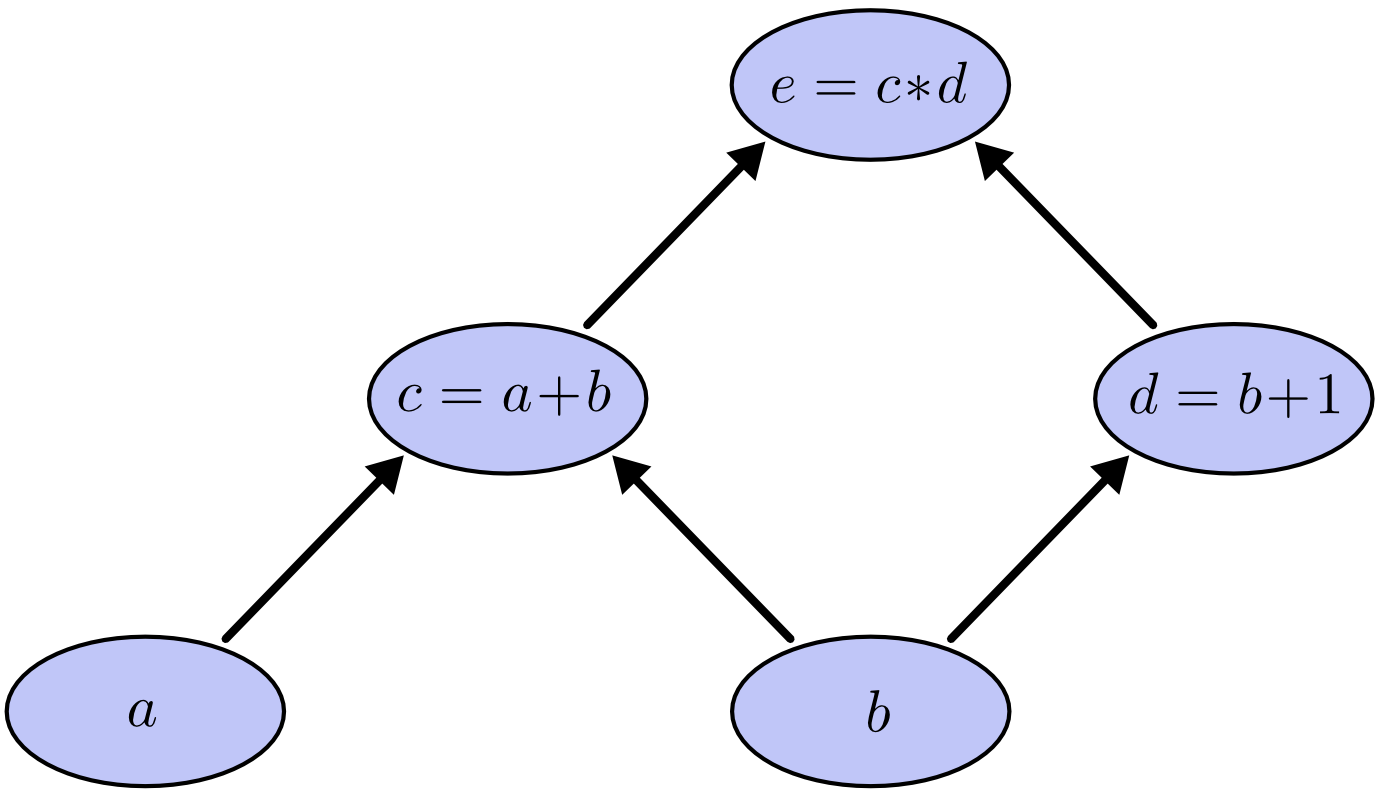

These sorts of graphs come up all the time in computer science, especially in talking about functional programs. They are very closely related to the notions of dependency graphs and call graphs. They’re also the core abstraction behind the popular deep learning framework Theano.

We can evaluate the expression by setting the input variables to certain values and computing nodes up through the graph. For example, let’s set a=2 and b=1:

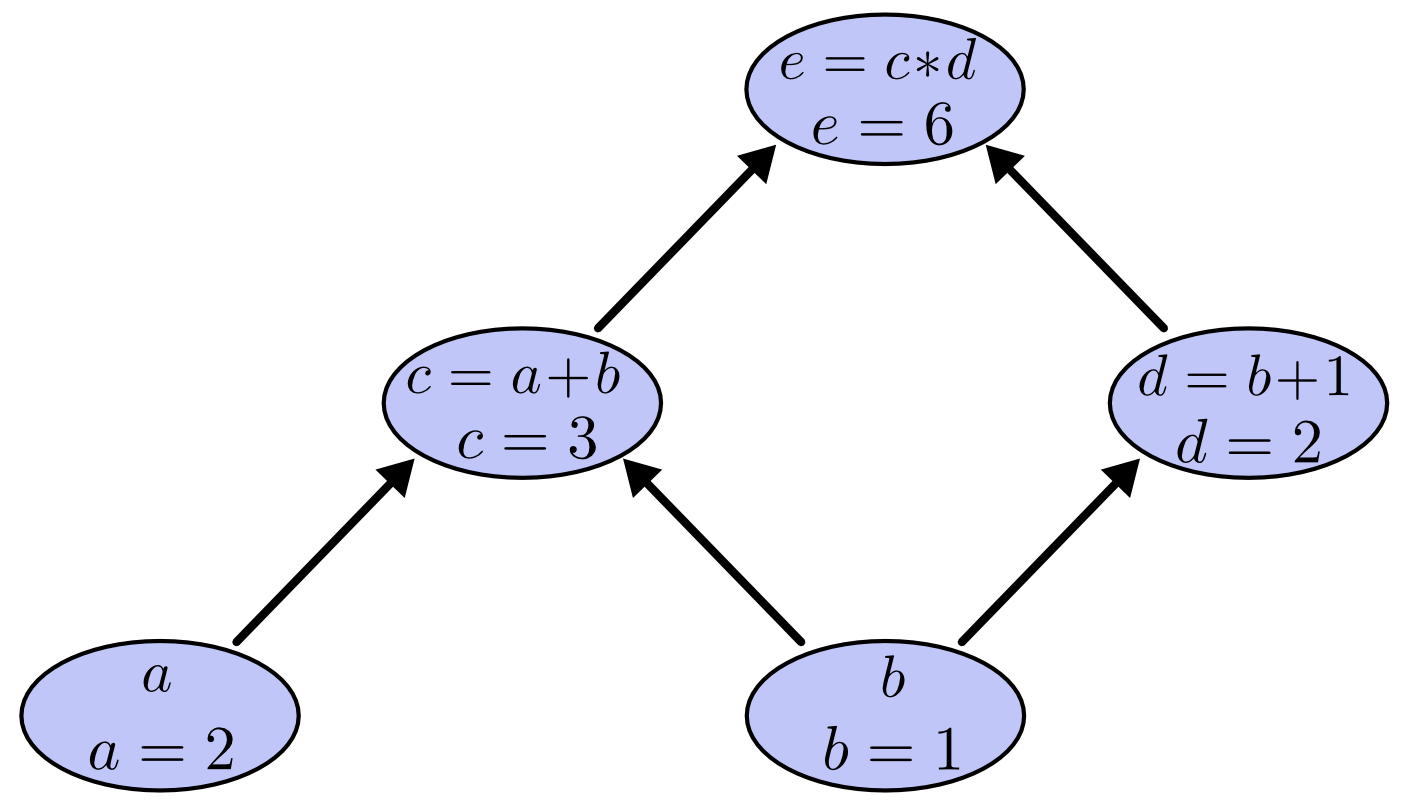



## Derivatives on computation graph

If one wants to understand derivatives in a computational graph, the key is to understand derivatives on the edges. If a directly affects c, then we want to know how it affects c. If a changes a little bit, how does c change? We call this the partial derivative of c with respect to a.

To evaluate the partial derivatives in this graph, we need the sum rule and the product rule:

$\frac{\partial}{\partial u}uv = u\frac{\partial v}{\partial u} + v\frac{\partial u}{\partial u} = v$

Below, the graph has the derivative on each edge labeled.

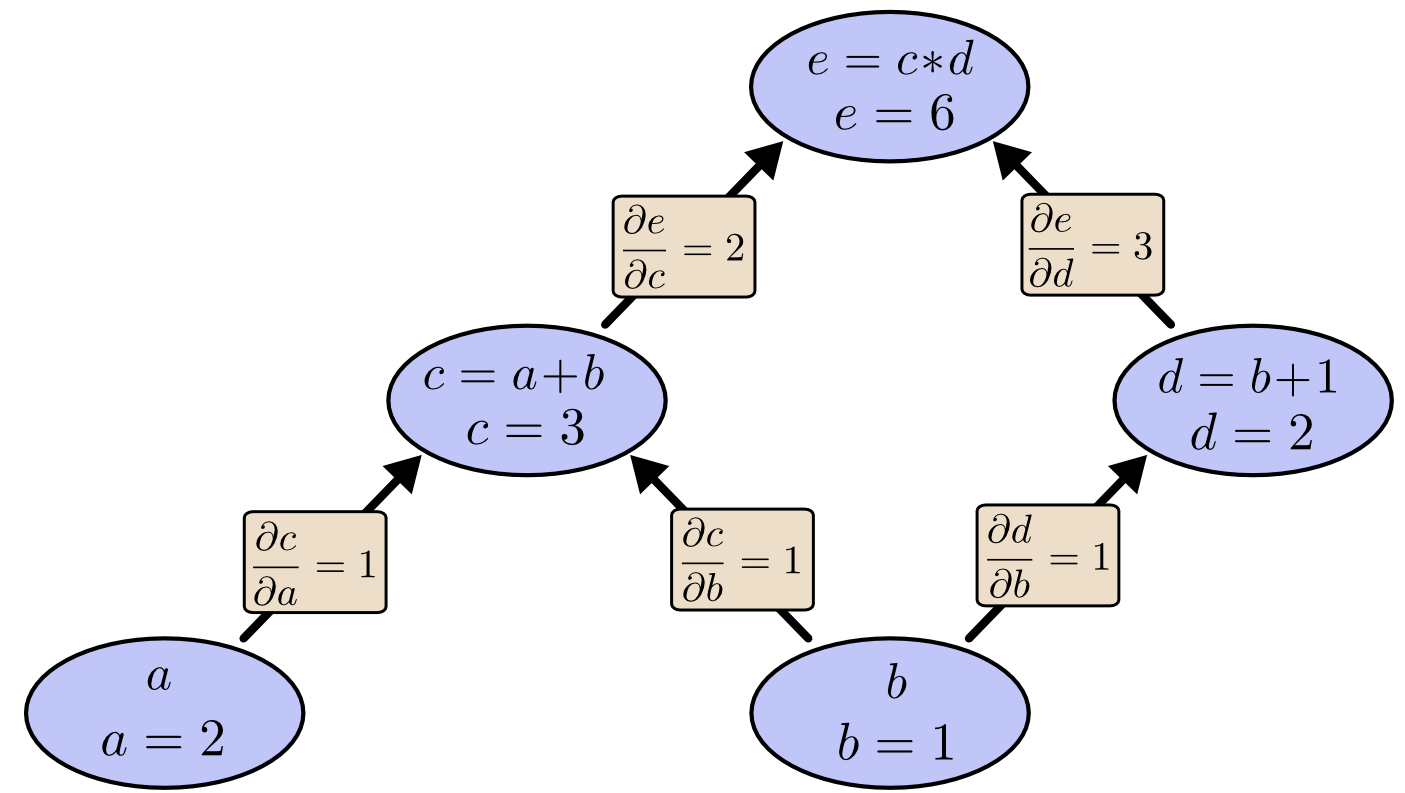

What if we want to understand how nodes that aren’t directly connected affect each other? Let’s consider how e is affected by a. If we change a at a speed of 1, c also changes at a speed of 1. In turn, c changing at a speed of 1 causes e to change at a speed of 2. So e changes at a rate of 1∗2 with respect to a.

The general rule is to sum over all possible paths from one node to the other, multiplying the derivatives on each edge of the path together. For example, to get the derivative of e with respect to b we get:

$\frac{\partial e}{\partial b}= 1*2 + 1*3$